In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
path_antoine = "/Users/antoine.gilson/Desktop/The-Design-and-Analysis-of-Benchmark-Experiments/Plots/"

In [3]:
beta2_values = np.linspace(0, 0.16, 9)
M = [50,100,150,200,500,1000,2000]

### Introduction, variables, training and test sets

In [57]:
def print_training_test_sets(n=150, m=150, seed=42):

    np.random.seed(seed)
    
    x = np.random.uniform(0, 5, n + m)
    x_train = x[:n]
    x_test = x[n:n+m]
    
    epsilon = np.random.normal(0, 1, n + m)
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]
    
    # Création de la figure avec subplots
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plotting X Training set
    ax[0, 0].scatter(np.arange(n), x_train, label="X Training set n = 150", color="blue", s=10)
    ax[0, 0].set_title("Training Set X")
    ax[0, 0].set_xlabel("Index")
    ax[0, 0].set_ylabel("Value")
    ax[0, 0].legend()
    ax[0, 0].grid()

    # Plotting X Test set
    ax[0, 1].scatter(np.arange(n, n + m), x_test, label="X Test set m = 150", color="red", s=10)
    ax[0, 1].set_title("Test Set X")
    ax[0, 1].set_xlabel("Index")
    ax[0, 1].set_ylabel("Value")
    ax[0, 1].legend()
    ax[0, 1].grid()

    # Plotting Epsilon Training set
    ax[1, 0].scatter(np.arange(n), epsilon_train, label="Epsilon Training set n = 150", color="green", s=10)
    ax[1, 0].set_title("Training Set Epsilon")
    ax[1, 0].set_xlabel("Index")
    ax[1, 0].set_ylabel("Value")
    ax[1, 0].legend()
    ax[1, 0].grid()

    # Plotting Epsilon Test set
    ax[1, 1].scatter(np.arange(n, n + m), epsilon_test, label="Epsilon Test set m = 150", color="orange", s=10)
    ax[1, 1].set_title("Test Set Epsilon")
    ax[1, 1].set_xlabel("Index")
    ax[1, 1].set_ylabel("Value")
    ax[1, 1].legend()
    ax[1, 1].grid()

    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.scatter(np.arange(n), x_train, label = "X Training set n = 150", color = "blue", s = 8)
    plt.scatter(np.arange(n, n+m), x_test, label = "X Test set m = 150", color = "red", s = 8)
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure()
    plt.scatter(np.arange(n), epsilon_train, label = "Eps Training set n = 150", color = "green", s = 8)
    plt.scatter(np.arange(n, n+m), epsilon_test, label = "Eps Test set m = 150", color = "orange", s = 8)
    plt.legend()
    plt.grid()
    plt.show()

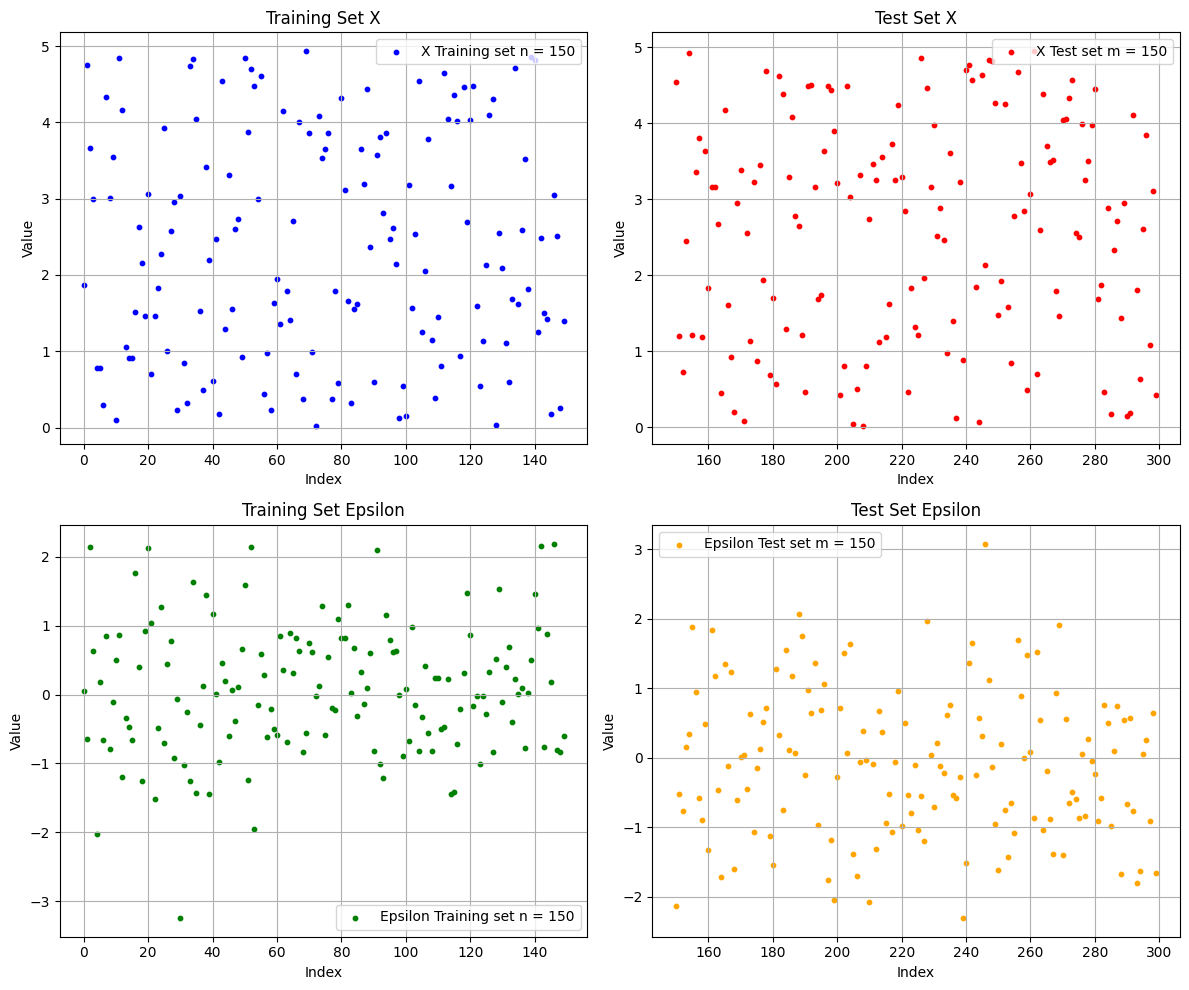

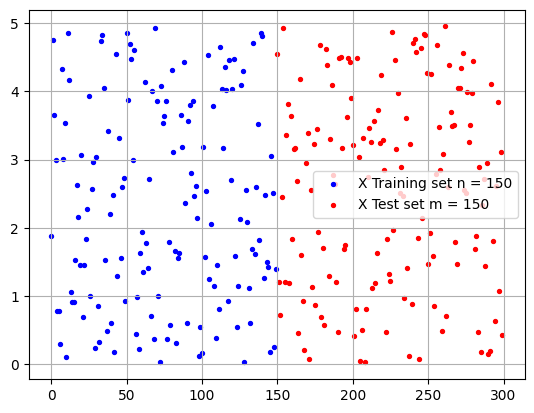

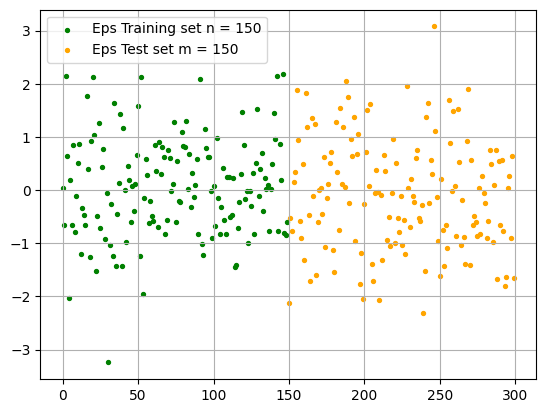

In [58]:
print_training_test_sets()

### Objective function : y 

In [5]:
def define_objective_function(m):
    
    n = 150
    np.random.seed(42)

    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]
    
    for beta2 in beta2_values:
            
       y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
       y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

       plt.figure()
       plt.scatter(np.arange(n), y_train, label = "Y corresponding to training set n = 150", color = "blue", s = 8)
       plt.scatter(np.arange(n, n+m), y_test, label = "Y corresponding to test set m =" f"{m}", color = "red", s = 8)
       plt.legend()
       plt.grid()
       filename = f"{path_antoine}/Objective/objective_y_m_{m}_beta2_{beta2}.png"
       plt.savefig(filename)

### Graphical approach of model precision and errors

In [59]:
def performance_metrics():
    
    n = 150

    M = [50, 100, 150, 200, 500, 1000, 2000]

    for m in M:

      np.random.seed(42)
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
          # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          differences = pa - pb

          plt.figure() # Erreur individuelle des modèles
          plt.title("Erreurs de prédiction des modèles pour " f"beta2 = {beta2}" " et pour "f"m = {m}" )  
      
          plt.scatter(x_test, pb, label = "pb = (y - yb) pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "orange", s = 8)
          plt.scatter(x_test, pa, label = "pa = (y - ya) pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "red", s = 8)
       
          plt.grid()
          plt.legend()

          filename = f"{path_antoine}/Erreurs/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)

          plt.show()

          plt.figure() # Différence de prédiction des modèles
          plt.title("Différence de prédiction des modèles pour " f"beta2 = {beta2}" " et pour "f"m = {m}" )  
      
          plt.scatter(x_test, differences, label = "pb = (y - yb) pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "red", s = 8)
          plt.axhline(y=0, color='black', linestyle='--', label='y = 0')
       
          plt.grid()
          plt.legend()

          filename = f"{path_antoine}/Differences/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)

          plt.show()

          plt.figure() # Fits des modèles 
          plt.title("Fits des modèles pour " f"beta2 = {beta2}" " et pour "f"m = {m}" )  

      
          plt.scatter(x_test, y_test, label = "Y réel", color = "green", s = 8)
          plt.scatter(x_test, y_pred_a, label = "Prédiction linéaire pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "red", s = 8)
          plt.scatter(x_test, y_pred_b, label = "Prédiction quadratique pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "orange", s = 8)
       
          plt.grid()
          plt.legend()

          filename = f"{path_antoine}/Fits/plot_m_{m}_beta2_{beta2}.png"
          plt.savefig(filename)

          plt.show()

In [7]:
def performance_metrics_2():
    
    n = 150
    M = [50, 100, 150, 200, 500, 1000, 2000]
    
    for m in M:
        np.random.seed(42)
        beta1 = 2
        epsilon = np.random.normal(0, 1, n + m) 
        x = np.random.uniform(0, 5, n + m)

        x_train = x[:n]
        x_test = x[n:n+m]

        epsilon_train = epsilon[:n]
        epsilon_test = epsilon[n:n+m]
    
        for beta2 in beta2_values:

            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
            y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

            # Linear Model : A
            model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
            y_pred_a = model_a.predict(x_test.reshape(-1, 1))
            pa = (y_test - y_pred_a)**2
    
            # Quadratic Model : B
            x_train_quad = np.column_stack((x_train, x_train**2))
            x_test_quad = np.column_stack((x_test, x_test**2))
            
            model_b = LinearRegression().fit(x_train_quad, y_train)
            y_pred_b = model_b.predict(x_test_quad)
            pb = (y_test - y_pred_b)**2

            differences = pa-pb

            # Calcul des quantiles et de la médiane
            q1 = np.percentile(differences, 25)
            median = np.median(differences)
            q3 = np.percentile(differences, 75)

            # Création du boxplot
            plt.figure(figsize=(10, 6))

            plt.scatter(x_test, differences, color='red', label='pa - pb ' f"beta2 = {beta2}" " et pour "f"m = {m}")
            plt.axhline(y=0, color='black', linestyle='--', label='y = 0')

            plt.boxplot(differences, positions=[max(x_test) + 1], widths=0.5, patch_artist=True,
                        boxprops=dict(facecolor='blue', color='blue', alpha=0.5),
                        medianprops=dict(color='yellow'),
                        whiskerprops=dict(color='blue'),
                        capprops=dict(color='blue'),
                        flierprops=dict(color='blue', markeredgecolor='blue'))


            plt.text(max(x_test) + 1, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, median, f'Median: {median:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='black')


            plt.title('Erreurs de prédiction du modèle quadratique pour ' f"beta2 = {beta2}" " et pour "f"m = {m}")
            plt.legend()
            plt.grid()
            filename = f"{path_antoine}/Erreurs/plot_m_{m}_beta2_{beta2}.png"
            plt.savefig(filename)
            plt.show()


### MSE

In [30]:
def MSE():
    
    n = 150
    m = 2000

    np.random.seed(42)
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    mse_A = []
    mse_B = []
    
    for beta2 in beta2_values:
            
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

         # Linear Model : A
        model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a = model_a.predict(x_test.reshape(-1, 1))

        mse_A.append(mean_squared_error(y_pred_a, y_test))
    
          # Quadratic Model : B
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))
            
        model_b = LinearRegression().fit(x_train_quad, y_train)
        y_pred_b = model_b.predict(x_test_quad)
        mse_B.append(mean_squared_error(y_pred_b, y_test))

    plt.figure()
    plt.title("Différence des MSE")
    plt.plot(beta2_values, mse_A, label = "MSE_A")
    plt.plot(beta2_values, mse_B, label = "MSE_B")
       
    plt.grid()
    plt.legend()
    plt.show()

### Descriptive Statistics, data

In [9]:
def descriptive_statistics():
    
    n = 150

    M = [50, 100, 150, 200, 500, 1000, 2000]

    empirical_means_A = []
    standard_deviations_A = []
    medians_A = []
    Q1_A = []
    Q3_A = []
    IQR_A = []

    empirical_means_B = []
    standard_deviations_B = []
    medians_B = []
    Q1_B = []
    Q3_B = []
    IQR_B = []

    for m in M:

      a = []
      b = []
      c = []
      d = []
      q = []
      iqr = []

      e = []
      f = []
      g = []
      h = []
      q_ = []
      iqr_ = []


      np.random.seed(42)
      beta1 = 2
      beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          mean_a = sum(pa)/m
          mean_b = sum(pb)/m

          a.append(mean_a)
          e.append(mean_b)

          std_a = np.std(pa, ddof=1)
          std_b = np.std(pb, ddof = 1)

          b.append(std_a)
          f.append(std_b)

          q1_a = np.percentile(pa, 25)
          med_a = np.percentile(pa, 50)        
          q3_a = np.percentile(pa, 75)

          q1_b = np.percentile(pb, 25)
          med_b = np.percentile(pb, 50)        
          q3_b = np.percentile(pb, 75)

          c.append(med_a)
          g.append(med_b)
          d.append(q1_a)
          q.append(q3_a)
          h.append(q1_b)
          q_.append(q3_b)

          iqr.append(q3_a - q1_a)
          iqr_.append(q3_b - q1_b)

      empirical_means_A.append(a)
      empirical_means_B.append(e)
      standard_deviations_A.append(b)
      standard_deviations_B.append(f)
      medians_A.append(c)
      medians_B.append(g)
      Q1_A.append(d)
      Q1_B.append(h)
      Q3_A.append(q)
      Q3_B.append(q_)
      IQR_A.append(iqr)
      IQR_B.append(iqr_)

    return empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B


empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B = descriptive_statistics()

In [10]:
def create_data():
    
    M = [50, 100, 150, 200, 500, 1000, 2000]
    
    empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B = descriptive_statistics()
    
    
    data_A_all = {
    "Empirical Mean": empirical_means_A,
    "Standard Deviation": standard_deviations_A,
    "Median": medians_A,
    "Q1": Q1_A,
    "Q3": Q3_A,
    "IQR": IQR_A
   }

    stats_A_all = pd.DataFrame(data_A_all, index=M)

    data_B_all = {
    "Empirical Mean": empirical_means_B,
    "Standard Deviation": standard_deviations_B,
    "Median": medians_B,
    "Q1": Q1_B,
    "Q3": Q3_B,
    "IQR": IQR_B
   }

    stats_B_all = pd.DataFrame(data_B_all, index=M)

    df_empirical_means_A = pd.DataFrame(empirical_means_A, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_A = pd.DataFrame(standard_deviations_A, index=M, columns=beta2_values).transpose()
    df_medians_A = pd.DataFrame(medians_A, index=M, columns=beta2_values).transpose()
    df_Q1_A = pd.DataFrame(Q1_A, index=M, columns=beta2_values).transpose()
    df_Q3_A = pd.DataFrame(Q3_A, index=M, columns=beta2_values).transpose()
    df_IQR_A = pd.DataFrame(IQR_A, index=M, columns=beta2_values).transpose()

    df_empirical_means_B = pd.DataFrame(empirical_means_B, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_B = pd.DataFrame(standard_deviations_B, index=M, columns=beta2_values).transpose()
    df_medians_B = pd.DataFrame(medians_B, index=M, columns=beta2_values).transpose()
    df_Q1_B = pd.DataFrame(Q1_B, index=M, columns=beta2_values).transpose()
    df_Q3_B = pd.DataFrame(Q3_B, index=M, columns=beta2_values).transpose()
    df_IQR_B = pd.DataFrame(IQR_B, index=M, columns=beta2_values).transpose()    

    return stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, \
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B


(stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()

In [37]:
df_Q1_A

,50,100,150,200,500,1000,2000
0.00,0.153903,0.153525,0.141020,0.113438,0.118142,0.110646,0.104219
0.02,0.141676,0.146858,0.143567,0.102054,0.125050,0.115005,0.098081
0.04,0.114830,0.178537,0.159214,0.092824,0.117939,0.113112,0.091887
0.06,0.113221,0.173574,0.130412,0.080662,0.117880,0.112237,0.090971
0.08,0.118932,0.179699,0.112957,0.074115,0.120845,0.111135,0.091279
0.10,0.127541,0.163594,0.117570,0.070229,0.121549,0.113543,0.087055
0.12,0.127138,0.179568,0.100748,0.079478,0.118332,0.111193,0.088079
0.14,0.106335,0.204366,0.086777,0.074761,0.123271,0.109881,0.092762
0.16,0.099556,0.200574,0.092835,0.079085,0.124173,0.106631,0.093924


### First shot looking at our Standard deviations

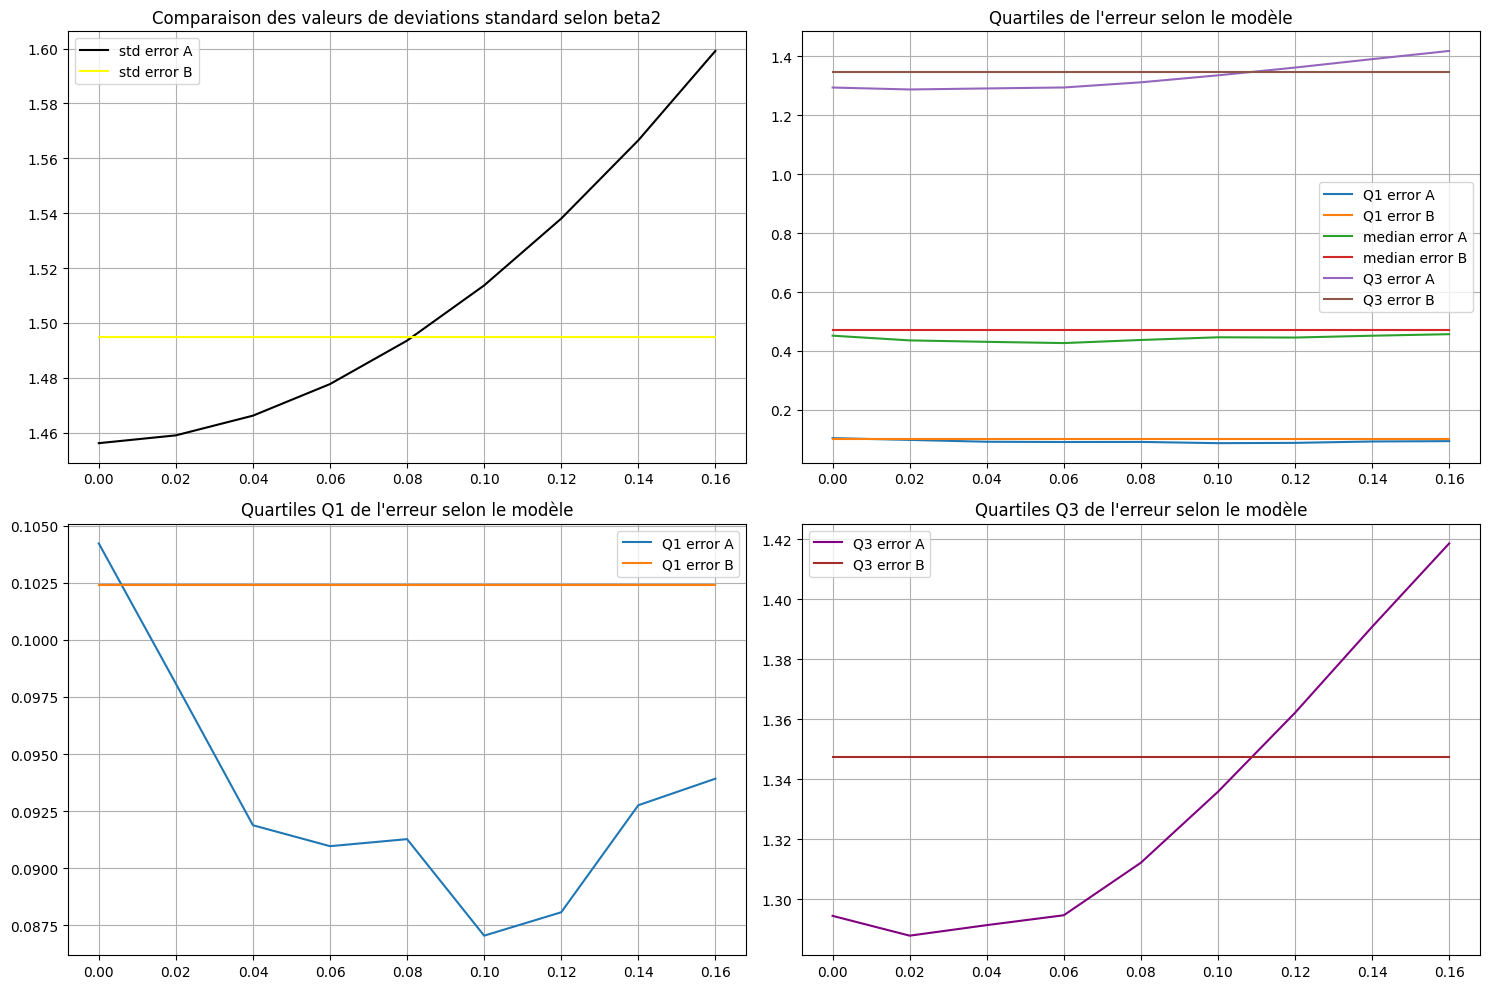

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Premier subplot : Comparaison des valeurs de deviations standard selon beta2
axs[0, 0].plot(beta2_values, df_empirical_standard_deviations_A[2000], label="std error A", color = "black")
axs[0, 0].plot(beta2_values, df_empirical_standard_deviations_B[2000], label="std error B", color = "yellow")
axs[0, 0].set_title("Comparaison des valeurs de deviations standard selon beta2")
axs[0, 0].grid()
axs[0, 0].legend()

# Deuxième subplot : Quartiles de l'erreur selon le modèle
axs[0, 1].plot(beta2_values, df_Q1_A[2000], label="Q1 error A")
axs[0, 1].plot(beta2_values, df_Q1_B[2000], label="Q1 error B")
axs[0, 1].plot(beta2_values, df_medians_A[2000], label="median error A")
axs[0, 1].plot(beta2_values, df_medians_B[2000], label="median error B")
axs[0, 1].plot(beta2_values, df_Q3_A[2000], label="Q3 error A")
axs[0, 1].plot(beta2_values, df_Q3_B[2000], label="Q3 error B")
axs[0, 1].set_title("Quartiles de l'erreur selon le modèle")
axs[0, 1].grid()
axs[0, 1].legend()

# Troisième subplot : Quartiles Q1 de l'erreur selon le modèle
axs[1, 0].plot(beta2_values, df_Q1_A[2000], label="Q1 error A")
axs[1, 0].plot(beta2_values, df_Q1_B[2000], label="Q1 error B")
axs[1, 0].set_title("Quartiles Q1 de l'erreur selon le modèle")
axs[1, 0].grid()
axs[1, 0].legend()

# Quatrième subplot : Quartiles Q3 de l'erreur selon le modèle
axs[1, 1].plot(beta2_values, df_Q3_A[2000], label="Q3 error A", color = "purple")
axs[1, 1].plot(beta2_values, df_Q3_B[2000], label="Q3 error B", color = "brown")
axs[1, 1].set_title("Quartiles Q3 de l'erreur selon le modèle")
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout()
plt.show()


### Inferential statistics

We already have the standard error of the mean (according to m and beta2), that gives us a first information of the precisation of mA

Derive formulas (or algorithms) for the standard error (SE) of the mean

Methods: 
- parametric estimates (consider different cases when n is small versus large and when VA is assumed to be Gaussian or not)
- bootstrap estimates

### 1 - Parametric estimates

### when n is large

In [12]:
def standard_error_n_large():

    n = 150

    (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()

    n_sqrt = np.sqrt(n)
    df_standard_error_A = df_empirical_standard_deviations_A.apply(lambda x: x / n_sqrt)
    df_standard_error_B = df_empirical_standard_deviations_B.apply(lambda x: x / n_sqrt)

    return df_standard_error_A, df_standard_error_B


df_standard_error_A, df_standard_error_B = standard_error_n_large()

### when n is small

In [13]:
def standard_error_n_small():
    n = 30
    confidence_level = 0.95
    df = n - 1
    
    (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
     stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()
    
    n_sqrt = np.sqrt(n)
    student = stats.t.ppf(confidence_level, df - 1)
    df_standard_error_small_A = df_empirical_standard_deviations_A.apply(lambda x: x*student / n_sqrt)
    df_standard_error_small_B = df_empirical_standard_deviations_B.apply(lambda x: x*student / n_sqrt)

    return df_standard_error_small_A, df_standard_error_small_B

### Parametric but VA is not gaussian

### 2 / Non parametric estimates - Bootstrap estimates

### bootstrap on test sample

In [14]:
def standard_error_bootstrap_test():
   
   n = 150
   np.random.seed(42)

   M = [50, 100, 150, 200, 500, 1000, 2000]

   B = 250

   se_bootstrap_A = []
   se_bootstrap_B = []

   for m in M:
   
      liste_A = []
      liste_B = []
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]

      x_train_quad = np.column_stack((x_train, x_train**2))

      bootstrap_indices = np.random.choice(m, size=(B, m), replace=True)
    
      for beta2 in beta2_values:
                
            liste_boot_A = []
            liste_boot_B = []
            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          
            for bootstrap_index in bootstrap_indices:
         
               x_test = x[bootstrap_index]
               y_test = beta1 * x_test + beta2 * x_test**2 + epsilon[bootstrap_index]
            
               model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
               y_pred_a = model_a.predict(x_test.reshape(-1, 1))
               pa = (y_test - y_pred_a)**2
    
               
               x_test_quad = np.column_stack((x_test, x_test**2))
               model_b = LinearRegression().fit(x_train_quad, y_train)
               y_pred_b = model_b.predict(x_test_quad)
               pb = (y_test - y_pred_b)**2

               sea = np.std(pa, ddof=1) / (n**0.5)
               seb = np.std(pb, ddof = 1) / (n**0.5)

               liste_boot_A.append(sea)
               liste_boot_B.append(seb)

            liste_A.append(np.mean(liste_boot_A))
            liste_B.append(np.mean(liste_boot_B))
    
      se_bootstrap_A.append(liste_A)
      se_bootstrap_B.append(liste_B)

   df_se_bootstrap_A = pd.DataFrame(se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B = pd.DataFrame(se_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_se_bootstrap_A, df_se_bootstrap_B

### bootstrap on train sample

In [15]:
def se_each_bootstrap(n, B, m):

    np.random.seed(42)

    se_bootstrap_A = []
    se_bootstrap_B = []

    beta1 = 2
    B = 250
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        liste_A = []
        liste_B = []

        for bootstrap_index in bootstrap_indices:
       

           x_train = x[bootstrap_index]
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]
      
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           sea = np.std(pa, ddof=1) / (n**0.5)
           seb = np.std(pb, ddof = 1) / (n**0.5)

           liste_A.append(sea)
           liste_B.append(seb)

        se_bootstrap_A.append(sum(liste_A)/B)
        se_bootstrap_B.append(sum(liste_B)/B)
    
    return se_bootstrap_A, se_bootstrap_B     


def standard_error_bootstrap_train():

   M = [50, 100, 150, 200, 500, 1000, 2000]

   liste_se_bootstrap_A = []
   liste_se_bootstrap_B = []

   for m in M:

      se_bootstrap_A, se_bootstrap_B = se_each_bootstrap(150,250,m)

      liste_se_bootstrap_A.append(se_bootstrap_A)
      liste_se_bootstrap_B.append(se_bootstrap_B)

   df_se_bootstrap_A_train = pd.DataFrame(liste_se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B_train = pd.DataFrame(liste_se_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_se_bootstrap_A_train, df_se_bootstrap_B_train

In [16]:
df_se_bootstrap_A_train, df_se_bootstrap_B_train = standard_error_bootstrap_train()
df_se_bootstrap_A_test, df_se_bootstrap_B_test = standard_error_bootstrap_test() 
df_standard_error_A, df_standard_error_B = standard_error_n_large()
df_standard_error_small_A, df_standard_error_small_B = standard_error_n_small()

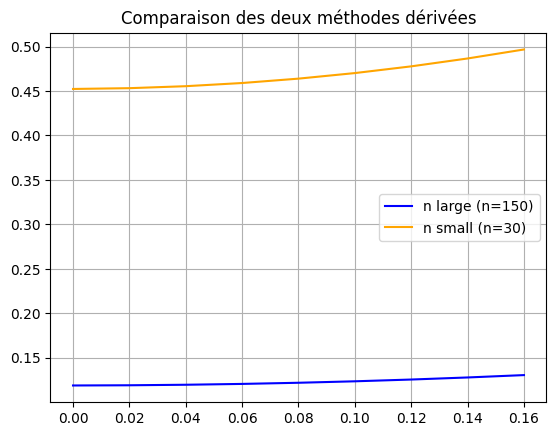

In [38]:
plt.figure()
plt.title("Comparaison des deux méthodes dérivées")
plt.plot(beta2_values, df_standard_error_A[2000], label="n large (n=150)", color ="blue")
plt.plot(beta2_values, df_standard_error_small_A[2000], label="n small (n=30)", color ="orange")
plt.grid()
plt.legend()
plt.show()

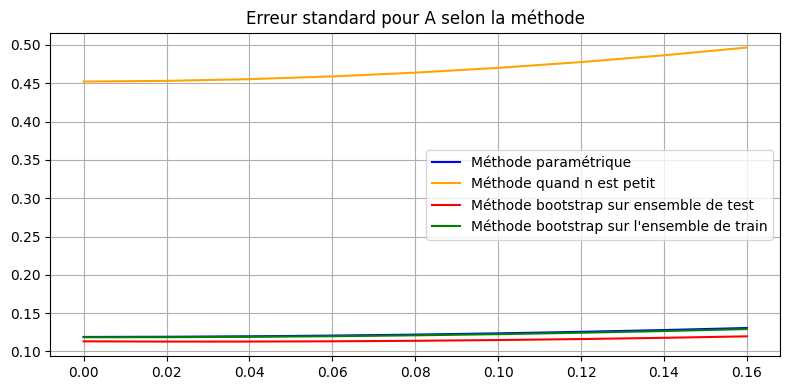

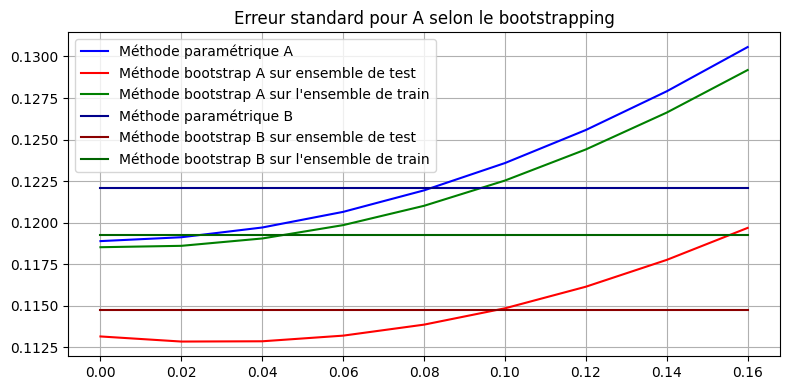

In [61]:


# Première figure : Comparaison des valeurs d'erreur standard obtenues selon la méthode
fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(beta2_values, df_standard_error_A[2000], label="Méthode paramétrique", color="blue")
ax1.plot(beta2_values, df_standard_error_small_A[2000], label="Méthode quand n est petit", color="orange")
ax1.plot(beta2_values, df_se_bootstrap_A_test[2000], label="Méthode bootstrap sur ensemble de test", color="red")
ax1.plot(beta2_values, df_se_bootstrap_A_train[2000], label="Méthode bootstrap sur l'ensemble de train", color="green")
ax1.set_title("Erreur standard pour A selon la méthode")
ax1.grid()
ax1.legend()

# Sauvegarde ou affichage de la première figure
plt.tight_layout()
plt.show()

# Deuxième figure : Comparaison des valeurs d'erreur standard selon le bootstrapping
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(beta2_values, df_standard_error_A[2000], label="Méthode paramétrique A", color="blue")
ax2.plot(beta2_values, df_se_bootstrap_A_test[2000], label="Méthode bootstrap A sur ensemble de test", color="red")
ax2.plot(beta2_values, df_se_bootstrap_A_train[2000], label="Méthode bootstrap A sur l'ensemble de train", color="green")
ax2.plot(beta2_values, df_standard_error_B[2000], label="Méthode paramétrique B", color="darkblue")
ax2.plot(beta2_values, df_se_bootstrap_B_test[2000], label="Méthode bootstrap B sur ensemble de test", color="darkred")
ax2.plot(beta2_values, df_se_bootstrap_B_train[2000], label="Méthode bootstrap B sur l'ensemble de train", color="darkgreen")
ax2.set_title("Erreur standard pour A selon le bootstrapping")
ax2.grid()
ax2.legend()

# Sauvegarde ou affichage de la deuxième figure
plt.tight_layout()
plt.show()


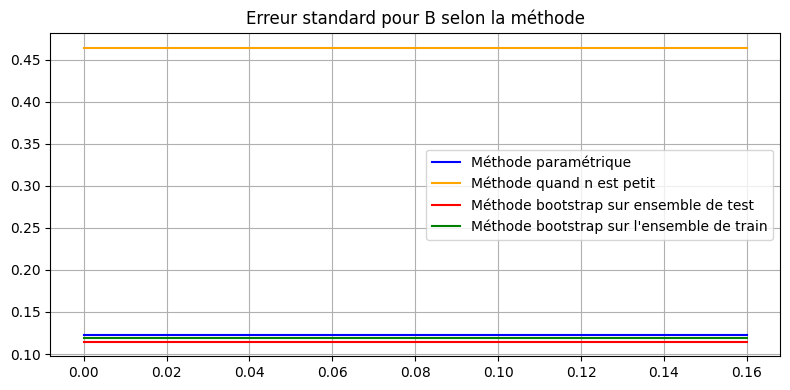

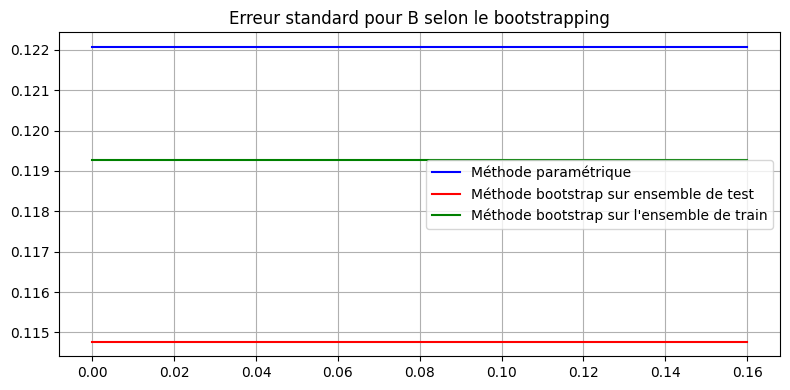

In [46]:
import matplotlib.pyplot as plt

# Première figure : Comparaison des valeurs d'erreur standard obtenues selon la méthode pour B
fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(beta2_values, df_standard_error_B[2000], label="Méthode paramétrique", color="blue")
ax1.plot(beta2_values, df_standard_error_small_B[2000], label="Méthode quand n est petit", color="orange")
ax1.plot(beta2_values, df_se_bootstrap_B_test[2000], label="Méthode bootstrap sur ensemble de test", color="red")
ax1.plot(beta2_values, df_se_bootstrap_B_train[2000], label="Méthode bootstrap sur l'ensemble de train", color="green")
ax1.set_title("Erreur standard pour B selon la méthode")
ax1.grid()
ax1.legend()

# Sauvegarde ou affichage de la première figure
plt.tight_layout()
plt.show()

# Deuxième figure : Comparaison des valeurs d'erreur standard selon le bootstrapping pour B
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(beta2_values, df_standard_error_B[2000], label="Méthode paramétrique", color="blue")
ax2.plot(beta2_values, df_se_bootstrap_B_test[2000], label="Méthode bootstrap sur ensemble de test", color="red")
ax2.plot(beta2_values, df_se_bootstrap_B_train[2000], label="Méthode bootstrap sur l'ensemble de train", color="green")
ax2.set_title("Erreur standard pour B selon le bootstrapping")
ax2.grid()
ax2.legend()

# Sauvegarde ou affichage de la deuxième figure
plt.tight_layout()
plt.show()


### Subsets of training sets (varying k)

In [18]:
def standard_error_varying_test_derived():

    liste_subsets = [50,100,150,200,500,1000,2000]

    n = 150
    m = 2000
    standard_errors_A = []
    standard_errors_B = []
    np.random.seed(42)
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    for k in liste_subsets:

      x_train = x[:n]
      x_test = x[n:n+k]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+k]

      liste_A = []
      liste_B = []
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          se_a = np.std(pa, ddof=1)/(n**0.5)
          se_b = np.std(pb, ddof = 1)/(n**0.5)

          liste_A.append(se_a)
          liste_B.append(se_b)

      standard_errors_A.append(liste_A)
      standard_errors_B.append(liste_B)

    df_se_varying_k_A = pd.DataFrame(standard_errors_A, index=liste_subsets, columns=beta2_values).transpose()
    df_se_varying_k_B = pd.DataFrame(standard_errors_B, index=liste_subsets, columns=beta2_values).transpose()

    return df_se_varying_k_A, df_se_varying_k_B


df_se_varying_k_A, df_se_varying_k_B = standard_error_varying_test_derived()


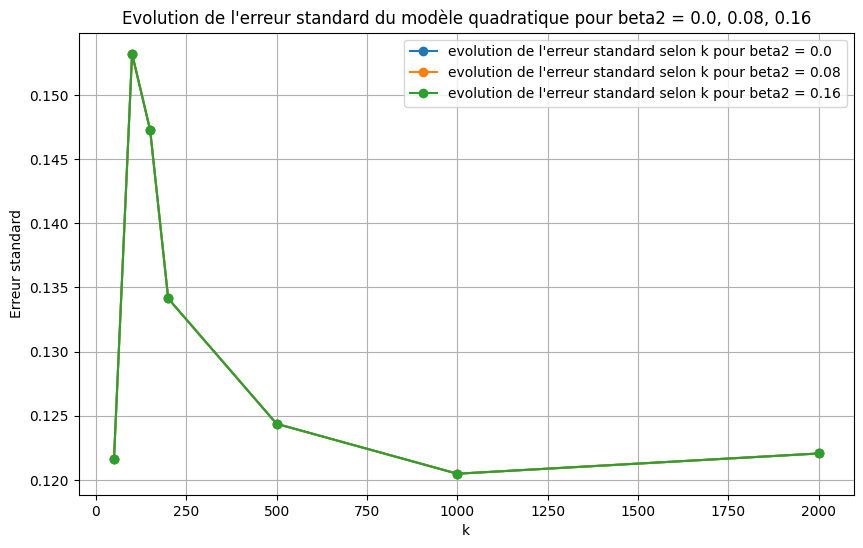

In [63]:
list_subsets = [50,100,150,200,500,1000,2000]
beta2_1 = 0.0
beta2_2 = 0.08
beta2_3 = 0.16

df1 = df_se_varying_k_B.loc[beta2_1]
df2 = df_se_varying_k_B.loc[beta2_2]
df3 = df_se_varying_k_B.loc[beta2_3]

plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, marker='o', label = "evolution de l'erreur standard selon k pour beta2 = "  f'{beta2_1}')
plt.plot(df2.index, df2.values, marker='o', label = "evolution de l'erreur standard selon k pour beta2 = " f'{beta2_2}')
plt.plot(df3.index, df3.values, marker='o', label = "evolution de l'erreur standard selon k pour beta2 = " f'{beta2_3}')
plt.title(f'Evolution de l\'erreur standard du modèle quadratique pour beta2 = {beta2_1}, {beta2_2}, {beta2_3}')
plt.xlabel('k')
plt.ylabel('Erreur standard')
plt.legend()
plt.grid(True)
plt.show()

### Varying k + Bootstrapped

### Bootstrapped on train ensemble

In [20]:
def se_each_bootstrap_varying(k):

    n = 150
    np.random.seed(42)
    m = 2000

    se_bootstrap_A = []
    se_bootstrap_B = []

    beta1 = 2
    B = 250
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+k]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+k]

    bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        liste_A = []
        liste_B = []

        for bootstrap_index in bootstrap_indices:
       

           x_train = x[bootstrap_index]
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]
      
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           sea = np.std(pa, ddof=1) / (n**0.5)
           seb = np.std(pb, ddof = 1) / (n**0.5)

           liste_A.append(sea)
           liste_B.append(seb)

        se_bootstrap_A.append(sum(liste_A)/B)
        se_bootstrap_B.append(sum(liste_B)/B)
    
    return se_bootstrap_A, se_bootstrap_B     


def standard_error_varying_test_bootstrapped_train():

   K = [50,100,150,200,500,1000,2000]

   liste_se_bootstrap_A = []
   liste_se_bootstrap_B = []

   for k in K:

      se_bootstrap_A, se_bootstrap_B = se_each_bootstrap_varying(k)

      liste_se_bootstrap_A.append(se_bootstrap_A)
      liste_se_bootstrap_B.append(se_bootstrap_B)

   df_se_varying_bootstrap_A_train = pd.DataFrame(liste_se_bootstrap_A, index=K, columns=beta2_values).transpose()
   df_se_varying_bootstrap_B_train = pd.DataFrame(liste_se_bootstrap_B, index=K, columns=beta2_values).transpose()

   return df_se_varying_bootstrap_A_train, df_se_varying_bootstrap_B_train

df_se_varying_bootstrap_A_train, df_se_varying_bootstrap_B_train = standard_error_varying_test_bootstrapped_train()
    

### Bootstrapped on test ensemble

In [21]:

def standard_error_varying_bootstrapped_test():
   
   n = 150
   np.random.seed(42)
   m = 2000

   B = 250

   K = [50,100,150,200,500,1000,2000]

   se_bootstrap_A = []
   se_bootstrap_B = []

   for k in K:
   
      liste_A = []
      liste_B = []
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+k]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+k]

      x_train_quad = np.column_stack((x_train, x_train**2))

      bootstrap_indices = np.random.choice(k, size=(B, k), replace=True)
    
      for beta2 in beta2_values:
                
            liste_boot_A = []
            liste_boot_B = []
            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          
            for bootstrap_index in bootstrap_indices:
         
               
               x_test = x[bootstrap_index]
               y_test = beta1 * x_test + beta2 * x_test**2 + epsilon[bootstrap_index]
            
               model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
               y_pred_a = model_a.predict(x_test.reshape(-1, 1))
               pa = (y_test - y_pred_a)**2
    
               
               x_test_quad = np.column_stack((x_test, x_test**2))
               model_b = LinearRegression().fit(x_train_quad, y_train)
               y_pred_b = model_b.predict(x_test_quad)
               pb = (y_test - y_pred_b)**2

               sea = np.std(pa, ddof=1) / (n**0.5)
               seb = np.std(pb, ddof = 1) / (n**0.5)

               liste_boot_A.append(sea)
               liste_boot_B.append(seb)

            liste_A.append(np.mean(liste_boot_A))
            liste_B.append(np.mean(liste_boot_B))
    
      se_bootstrap_A.append(liste_A)
      se_bootstrap_B.append(liste_B)

   df_se_bootstrap_A = pd.DataFrame(se_bootstrap_A, index=K, columns=beta2_values).transpose()
   df_se_bootstrap_B = pd.DataFrame(se_bootstrap_B, index=K, columns=beta2_values).transpose()

   return df_se_bootstrap_A, df_se_bootstrap_B

df_se_varying_bootstrap_A_test, df_se_varying_bootstrap_B_test = standard_error_varying_bootstrapped_test()

Comparision bootstrapping test vs train

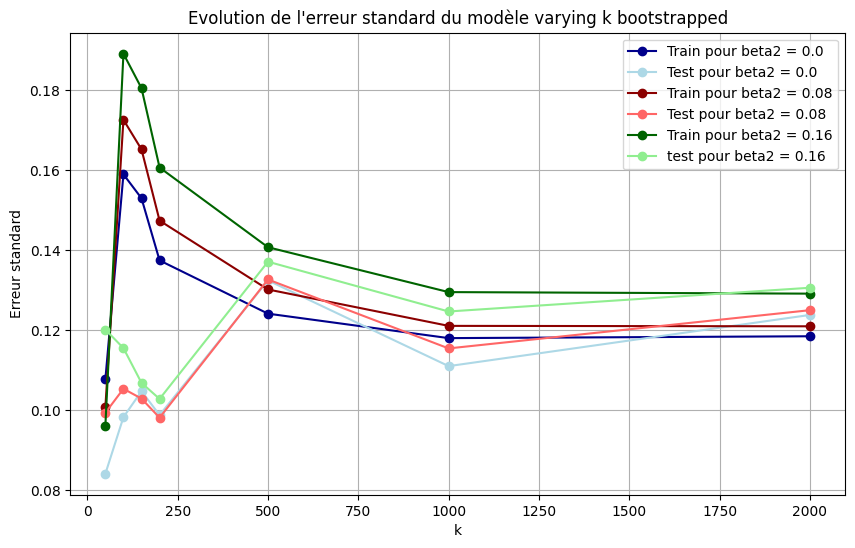

In [22]:
df1 = df_se_varying_bootstrap_A_train.loc[beta2_1]
df2 = df_se_varying_bootstrap_A_train.loc[beta2_2]
df3 = df_se_varying_bootstrap_A_train.loc[beta2_3]
df4 = df_se_varying_bootstrap_A_test.loc[beta2_1]
df5 = df_se_varying_bootstrap_A_test.loc[beta2_2]
df6 = df_se_varying_bootstrap_A_test.loc[beta2_3]


plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, marker='o', label = "Train pour beta2 = "  f'{beta2_1}', color = "darkblue")
plt.plot(df1.index, df4.values, marker='o', label = "Test pour beta2 = "  f'{beta2_1}', color = "lightblue")
plt.plot(df2.index, df2.values, marker='o', label = "Train pour beta2 = " f'{beta2_2}', color = "darkred")
plt.plot(df2.index, df5.values, marker='o', label = "Test pour beta2 = " f'{beta2_2}', color = "#FF6666")
plt.plot(df3.index, df3.values, marker='o', label = "Train pour beta2 = " f'{beta2_3}', color = "darkgreen")
plt.plot(df3.index, df6.values, marker='o', label = "test pour beta2 = " f'{beta2_3}', color = "lightgreen")
plt.title('Evolution de l\'erreur standard du modèle varying k bootstrapped')
plt.xlabel('k')
plt.ylabel('Erreur standard')
plt.legend()
plt.grid(True)
plt.show()

### Comparison between bootstrapped method and derived method

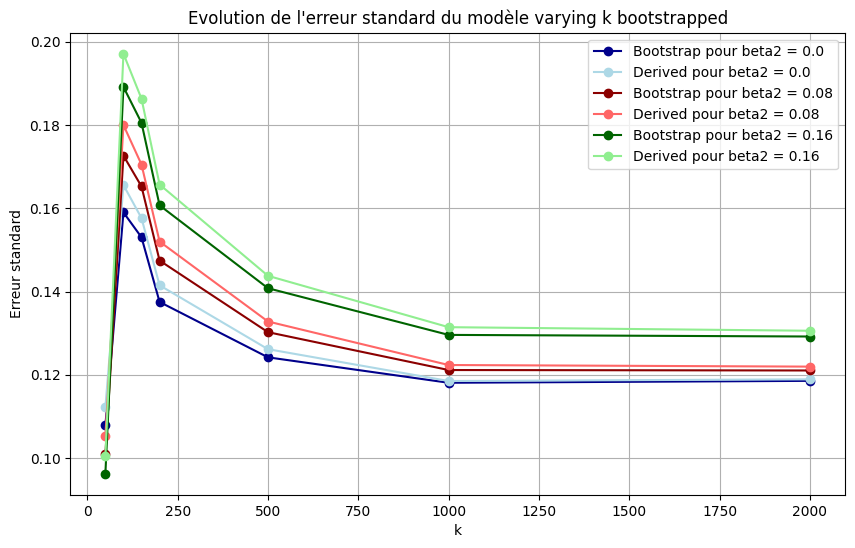

In [48]:
df1 = df_se_varying_bootstrap_A_train.loc[beta2_1]
df2 = df_se_varying_bootstrap_A_train.loc[beta2_2]
df3 = df_se_varying_bootstrap_A_train.loc[beta2_3]
df4 = df_se_varying_k_A.loc[beta2_1]
df5 = df_se_varying_k_A.loc[beta2_2]
df6 = df_se_varying_k_A.loc[beta2_3]


plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, marker='o', label = "Bootstrap pour beta2 = "  f'{beta2_1}', color = "darkblue")
plt.plot(df1.index, df4.values, marker='o', label = "Derived pour beta2 = "  f'{beta2_1}', color = "lightblue")
plt.plot(df2.index, df2.values, marker='o', label = "Bootstrap pour beta2 = " f'{beta2_2}', color = "darkred")
plt.plot(df2.index, df5.values, marker='o', label = "Derived pour beta2 = " f'{beta2_2}', color = "#FF6666")
plt.plot(df3.index, df3.values, marker='o', label = "Bootstrap pour beta2 = " f'{beta2_3}', color = "darkgreen")
plt.plot(df3.index, df6.values, marker='o', label = "Derived pour beta2 = " f'{beta2_3}', color = "lightgreen")
plt.title('Evolution de l\'erreur standard du modèle varying k bootstrapped')
plt.xlabel('k')
plt.ylabel('Erreur standard')
plt.legend()
plt.grid(True)
plt.show()

### Comparison between varying test samples and varying test size (corresponds when k = m)

[]

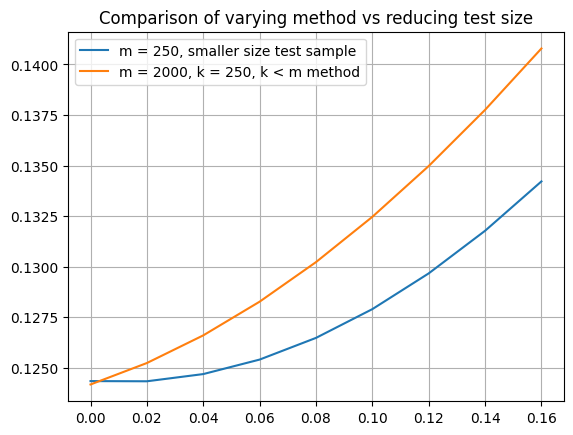

In [23]:
plt.figure()
plt.title("Comparison of varying method vs reducing test size")
plt.plot(beta2_values, df_se_bootstrap_A_train[500], label = "m = 250, smaller size test sample")
plt.plot(beta2_values, df_se_varying_bootstrap_A_train[500], label = "m = 2000, k = 250, k < m method")
plt.plot()
plt.grid()
plt.legend()
plt.plot()

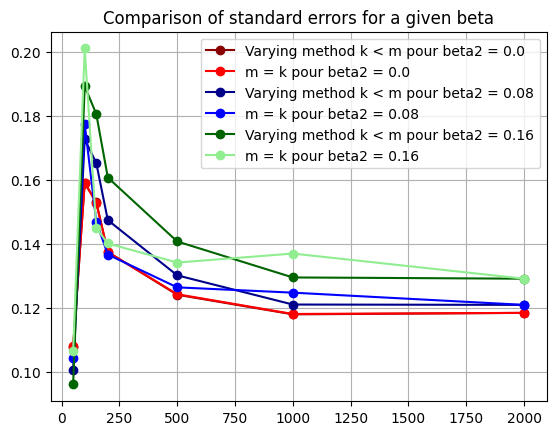

In [24]:
# Comparison for a given value 
df1 = df_se_varying_bootstrap_A_train.loc[beta2_1]
dff1 = df_se_bootstrap_A_train.loc[beta2_1]
df2 = df_se_varying_bootstrap_A_train.loc[beta2_2]
dff2 = df_se_bootstrap_A_train.loc[beta2_2]
df3 = df_se_varying_bootstrap_A_train.loc[beta2_3]
dff3 = df_se_bootstrap_A_train.loc[beta2_3]

plt.figure()
plt.title("Comparison of standard errors for a given beta")


plt.plot(df1.index, df1.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_1}', color = "darkred") # confondue
plt.plot(dff1.index, dff1.values, marker='o', label = "m = k pour beta2 = " f'{beta2_1}', color = "red")
plt.plot(df2.index, df2.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_2}', color = "darkblue")
plt.plot(dff2.index, dff2.values, marker='o', label = "m = k pour beta2 = " f'{beta2_2}', color = "blue")
plt.plot(df3.index, df3.values, marker='o', label = "Varying method k < m pour beta2 = " f'{beta2_3}', color = "darkgreen")
plt.plot(dff3.index, dff3.values, marker='o', label = "m = k pour beta2 = " f'{beta2_3}', color = "lightgreen")

plt.grid()
plt.legend()
plt.show()

### Confidence interval of the mean

### Parametric method

In [25]:
def create_interval(lower, upper):
      return pd.Interval(left=lower, right=upper, closed='both')


def confidence_interval_mean():
     
   alpha = 0.05
   n = 150
     
   (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
     stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()
    
   df_standard_error_A, df_standard_error_B = standard_error_n_large()

   t_critical = stats.t.ppf(1 - alpha / 2, n - 1)
   CI_lower_A = df_empirical_means_A - t_critical * df_standard_error_A
   CI_lower_B = df_empirical_means_B - t_critical * df_standard_error_B
   CI_upper_A = df_empirical_means_A + t_critical * df_standard_error_A
   CI_upper_B = df_empirical_means_B + t_critical * df_standard_error_B
     
   confidence_intervals_A = pd.DataFrame(index=CI_lower_A.index, columns=CI_lower_A.columns)
   confidence_intervals_B = pd.DataFrame(index=CI_lower_B.index, columns=CI_lower_B.columns)

   for col in CI_lower_A.columns:
    confidence_intervals_A[col] = CI_lower_A[col].combine(CI_upper_A[col], create_interval)

   for col in CI_lower_B.columns:
    confidence_intervals_B[col] = CI_lower_B[col].combine(CI_upper_B[col], create_interval)

   return confidence_intervals_A, confidence_intervals_B

confidence_intervals_A, confidence_intervals_B = confidence_interval_mean()

### Bootstrap

In [50]:
def conf_each_bootstrap(n, B, m):

    np.random.seed(42)

    ci_bootstrap_A = []
    ci_bootstrap_B = []

    beta1 = 2
    B = 250
    alpha = 0.05
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        moy_boot_A = []
        moy_boot_B = []

        for bootstrap_index in bootstrap_indices:
       

           x_train = x[bootstrap_index]
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2
    
           moy_boot_A.append(np.mean(pa))
           moy_boot_B.append(np.mean(pb))

        lower_A = np.percentile(moy_boot_A, 100 * (alpha / 2))
        upper_A = np.percentile(moy_boot_A, 100 * (1 - alpha / 2))
        lower_B = np.percentile(moy_boot_B, 100 * (alpha / 2))
        upper_B = np.percentile(moy_boot_B, 100 * (1 - alpha / 2))

        ci_bootstrap_A.append(pd.Interval(left=lower_A, right=upper_A, closed='both'))
        ci_bootstrap_B.append(pd.Interval(left=lower_B, right=upper_B, closed='both'))
    
    return ci_bootstrap_A, ci_bootstrap_B     

def confidence_interval_bootstrap():

   M = [50, 100, 150, 200, 500, 1000, 2000]

   liste_ci_bootstrap_A = []
   liste_ci_bootstrap_B = []

   for m in M:

      ci_bootstrap_A, ci_bootstrap_B = conf_each_bootstrap(150,250,m)

      liste_ci_bootstrap_A.append(ci_bootstrap_A)
      liste_ci_bootstrap_B.append(ci_bootstrap_B)

   df_ci_bootstrap_A = pd.DataFrame(liste_ci_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_ci_bootstrap_B = pd.DataFrame(liste_ci_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_ci_bootstrap_A, df_ci_bootstrap_B

df_ci_bootstrap_A, df_ci_bootstrap_B = confidence_interval_bootstrap()

## Inferential statistics : is a model better than the other

### Confidence interval for the difference

### Derive formula

### Different subsets 

### Statistical testing 

In [68]:
def power_simulation():

    np.random.seed(42)
    n= 150
    m = 2000
    power = []
    standard_errors = []
    test_statistics = []
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    for beta2 in beta2_values:

        
        y_train = beta1 * x_train + beta2 * x_train **2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model
        model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
        pa = (y_test-y_pred_a1)**2

            # Quadratic Model
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))    
        model_a2 = LinearRegression().fit(x_train_quad, y_train)
        y_pred_a2 = model_a2.predict(x_test_quad)
        pb = (y_test-y_pred_a2)**2

        diff = pa - pb

        d_barre = np.mean(diff)
        se = np.std(diff)/(m**0.5)
 
        test_stat = d_barre/se # Statistique pour l'hypothèse nulle

        student = stats.t.ppf(0.95, df=m-1)
        test_alt = student - test_stat
        puissance = 1 - stats.norm.cdf(test_alt, 0, 1)
       
        standard_errors.append(se)
        test_statistics.append(test_stat)
        power.append(puissance)

    return  standard_errors, test_statistics, power


standard_errors, test_statistics, power = power_simulation()


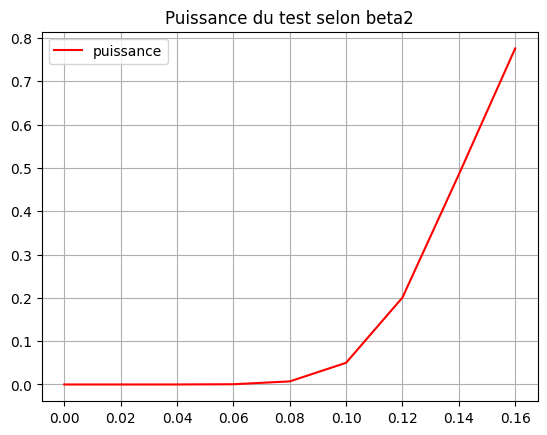

In [71]:
plt.figure()
plt.title("Puissance du test selon beta2")
plt.plot(beta2_values, power, label = "puissance", color = "red")
plt.grid()
plt.legend()
plt.show()

### Bootstrapped

In [76]:
def power_simulation_boot():

    np.random.seed(42)
    n = 150
    m = 2000
    power = []
    standard_errors = []
    test_statistics = []
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    B = 250
    bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        moy_boot_diff = []

        for bootstrap_index in bootstrap_indices:
       
           x_train = x[bootstrap_index]
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           diff = pa - pb
    
           moy_boot_diff.append(np.mean(diff))

        d_barre = np.mean(moy_boot_diff)
        se = np.std(moy_boot_diff)/(m**0.5)
 
        test_stat = d_barre/se # Statistique pour l'hypothèse nulle

        student = stats.t.ppf(0.95, df=m-1)
        test_alt = student - test_stat
        puissance = 1 - stats.norm.cdf(test_alt, 0, 1)
       
        standard_errors.append(se)
        test_statistics.append(test_stat)
        power.append(puissance)

    return  standard_errors, test_statistics, power


standard_errors_boot, test_statistics_boot, power_boot = power_simulation_boot()


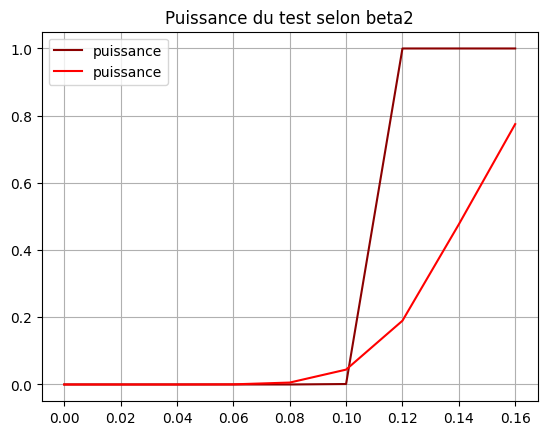

In [77]:
plt.figure()
plt.title("Puissance du test selon beta2")
plt.plot(beta2_values, power_boot, label = "puissance", color = "darkred")
plt.plot(beta2_values, power, label = "puissance", color = "red")
plt.grid()
plt.legend()
plt.show()